<a href="https://colab.research.google.com/github/sandipbnkr/MachineLearning/blob/main/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
29/11/2023 live session

In [3]:
#KNN algo implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
#load dataset
df=pd.read_csv('/content/Social_Net_class.csv')

In [5]:
df.Purchased.unique()

array([0, 1])

In [6]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
#remove user id coloum
df.drop(columns=['User ID'],inplace=True)

In [8]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df[:2]

df['Gender'].unique()

#to check unique records

array(['Male', 'Female'], dtype=object)

In [10]:
df['Gender'].replace({'Male':0,'Female':1})

# if u want to use numpy then  np.where(df.where=='Male',0,1)
#so again u need to use result in original

0      0
1      0
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: Gender, Length: 400, dtype: int64

In [ ]:
#or  df['Gender'].map({'Male':0,'Female':1}) and Female with 1

In [ ]:
#df['Gender'].str.replace('Male','0') but it gives u object but we need number

In [11]:
#Or we can use label encoder
#convert gender to 0 amd 1
lb=LabelEncoder()
lb.fit_transform(df['Gender'])
#but it uses 1 and 0 not 0 and 1 , reverse conversion as per occurence of classes
lb.classes_

array(['Female', 'Male'], dtype=object)

In [12]:
df['Gender']=lb.fit_transform(df['Gender'])

In [13]:
df.shape

(400, 4)

In [14]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [23]:
#prepare input and output

#means all rows all colomn but not last

x=df.iloc[:,:-1]
y=df.Purchased

In [24]:
x.shape

(400, 3)

In [25]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [26]:
#training phase
knn=KNeighborsClassifier()
#default 5 neighbours
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
knn.n_neighbors
#to find neighbours after fit only

5

In [20]:
y_pred=knn.predict(x_test)

In [48]:
knn.predict_proba([[1,39,45000]])
#gives 0 and 1 probability


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.8, 0.2]])

In [27]:
#test model
#lets measure perfomance
cm=confusion_matrix(y_test,y_pred)

<Axes: >

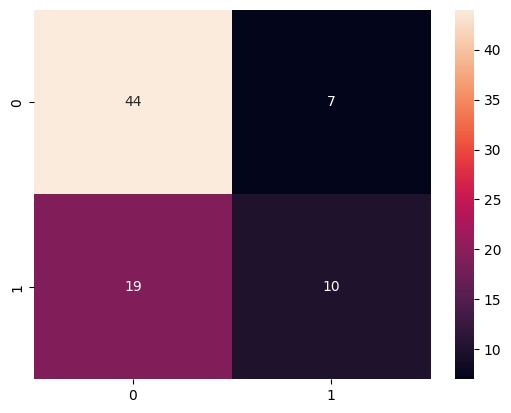

In [28]:
sns.heatmap(cm,annot=True)

In [29]:
#check report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        51
           1       0.59      0.34      0.43        29

    accuracy                           0.68        80
   macro avg       0.64      0.60      0.60        80
weighted avg       0.66      0.68      0.65        80



In [30]:
#check training data score
knn.score(x_train,y_train)*100

85.625

In [ ]:
#imp is to decide proper K value, now its default 5

In [ ]:
#lets find  k value

In [31]:
from sklearn.metrics import accuracy_score

In [34]:
sk=[]
for i in range(1,20):
  knn1=KNeighborsClassifier(i)
  knn1.fit(x_train,y_train)
  y_pred=knn1.predict(x_test)
  sk.append(accuracy_score(y_test,y_pred))

In [35]:
print(sk)

[0.7625, 0.8375, 0.8625, 0.8625, 0.825, 0.85, 0.85, 0.85, 0.8625, 0.85, 0.875, 0.8375, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.8625]


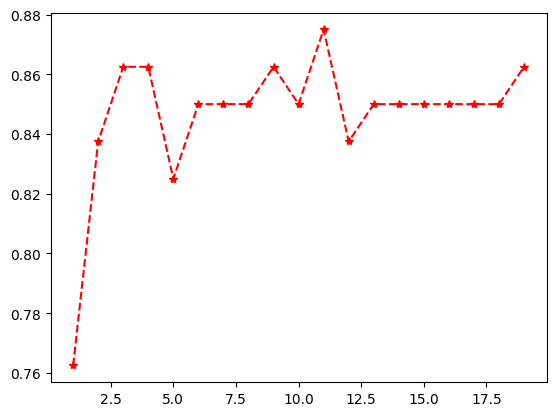

In [50]:
#lets plot above data
#plt.plot(range(1,21),sk,'--*r')
plt.plot(range(1,20),sk,'--*r')

#plt.xlim(1,20)

In [ ]:
#choose k value options ae 1,3,6,8.9
#how to choose best : as we have 2 classes so let schoose 9



In [51]:
#from above logs after discussion we choose k=9
knn3=KNeighborsClassifier(n_neighbors=11)
knn3.fit(x_train,y_train)
y_pred=knn3.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
y_test,values

In [52]:
#check confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.93      0.90      0.91        29

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [41]:
x.describe()
#data variations , salary value more value than gender value and age
#estimated result is combination of all factors and salary dominates all other factors

#from this info we can conclude salary will dominate remaining features hence we need to apply scaling

,Gender,Age,EstimatedSalary
count,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000
std,0.500526,10.482877,34096.960282
min,0.000000,18.000000,15000.000000
25%,0.000000,29.750000,43000.000000
50%,0.000000,37.000000,70000.000000
75%,1.000000,46.000000,88000.000000
max,1.000000,60.000000,150000.000000


In [ ]:
#x[start:stop]
x[:2]

In [54]:
#uses formalua to get value in range -3 to +3   or max upto -10 to +10
#=(x-nue)/sigma std
#19000-mean(x)/std(x)
#standard deviation means diference or variance

sc=StandardScaler()
sc.fit(x)
sc.transform(x)

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [55]:
x_new=sc.transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.2)

In [56]:
knn3.fit(x_train,y_train)
#now check confusion matrix
y_pred=knn3.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [57]:
print(classification_report(y_test,y_pred))

# standard scaler and normalizer are used but its

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.91      0.97      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

